In [1]:
%%capture
%run "../src/read_data.py";

In [2]:
df = df_area_coloc

In [3]:
def find_biggest_diffs(df, key, values):

    df_diff = pd.DataFrame(columns=["Difference score"])
    for column in df.columns:
        data1 = df.xs(values[0], level=key, axis=0)[column]
        data2 = df.xs(values[1], level=key, axis=0)[column]

        df_temp = pd.DataFrame(data=[data1.mean() - data2.mean()], columns=["Difference score"], index=[column])
        df_diff = pd.concat([df_diff, df_temp])

    return df_diff

df_area_coloc_norm = df_area_norm.xs("coloc", level="celltype", axis=0)
df_diff = find_biggest_diffs(df_area_coloc_norm, "solution2", ["water", "casein"])

In [4]:
df_diff

,Difference score
Clear Label,-1.890246
root,-0.142659
"Frontal pole, layer 6a",0.000545
"Frontal pole, layer 6b",0.000000
"Primary motor area, Layer 1",0.001526
...,...
choroid plexus,-0.014077
third ventricle,-0.102829
cerebral aqueduct,-0.061768
fourth ventricle,0.000000


In [9]:
df_diff
sorted_df_diff = df_diff.sort_values(by="Difference score")
sorted_df_diff.to_csv(folder+"difference.csv")

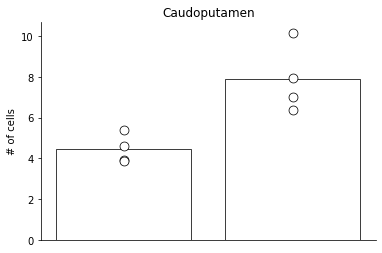

In [43]:
import trompy as tp
import matplotlib.pyplot as plt

def single_region_fig(df, key):

    data_water = df[df["solution2"] == "water"][key]
    data_casein = df[df["solution2"] == "casein"][key]

    f, ax = plt.subplots()
    _ = tp.barscatter([data_water, data_casein], ax=ax)
    ax.set_title(key)
    ax.set_ylabel("# of cells")

df = df_percent
single_region_fig(df, "Caudoputamen")

In [21]:
df["Caudoputamen"]

mouse
FT106    100.122358
FT112     11.293401
FT118     34.786155
FT120     44.218434
FT126     42.921021
FT136     26.501241
FT127     24.891507
FT133     22.133285
Name: Caudoputamen, dtype: float64

In [56]:
def find_percent_coloc(df1, df2, min_cell_count=5):

    df_vars = df1.iloc[:, :5]
    df_percent = (df1.iloc[:, 5:] / df2.iloc[:, 5:]) * 100

    for col in df_percent.columns:
        if (df2[col].min() < min_cell_count) or (df2[col].isnull().values.any()):
            df_percent.drop(columns =[col], inplace=True)

    df_percent = pd.concat([df_vars, df_percent], axis=1)

    return df_percent

df_percent = find_percent_coloc(df_coloc, df_fos)
    


In [58]:
df_percent

,diet,sex,solution1,solution2,celltype,Clear Label,root,"Primary motor area, Layer 2/3","Primary motor area, Layer 5","Primary motor area, Layer 6a",...,stria terminalis,medial forebrain bundle,principal mammillary tract,mammillothalamic tract,mammillotegmental tract,stria medullaris,fasciculus retroflexus,lateral ventricle,subependymal zone,third ventricle
mouse,,,,,,,,,,,,,,,,,,,,,
FT106,nr,male,casein,casein,coloc,10.307738,17.050691,7.189542,6.195965,10.102157,...,10.000000,42.857143,0.000000,22.330097,33.333333,3.448276,17.431193,7.502468,10.416667,22.195704
FT112,pr,male,casein,water,coloc,6.946454,13.703704,4.504505,7.744108,4.451039,...,16.666667,14.285714,16.666667,16.363636,0.000000,7.142857,27.710843,9.554140,0.000000,24.271845
FT118,nr,male,casein,casein,coloc,21.716826,21.303258,7.692308,8.154506,10.666667,...,8.333333,31.818182,48.484848,47.727273,27.272727,23.750000,32.758621,10.304450,19.512195,31.927711
FT120,pr,male,casein,casein,coloc,12.534101,19.409283,4.273504,5.922551,6.562500,...,10.000000,18.000000,11.111111,13.157895,13.043478,16.666667,32.653061,7.709251,7.594937,15.243902
FT126,pr,male,casein,casein,coloc,12.903226,25.625000,15.503876,12.121212,9.917355,...,0.000000,20.000000,30.000000,19.607843,23.076923,19.811321,25.641026,8.235294,6.666667,37.500000
FT136,pr,male,casein,water,coloc,3.703704,15.270936,2.163833,3.578947,2.978723,...,9.433962,18.604651,19.354839,6.818182,25.000000,17.441860,33.707865,7.849829,7.692308,22.727273
FT127,nr,male,casein,water,coloc,20.116618,26.068376,6.000000,7.526882,7.449857,...,21.052632,33.870968,33.333333,10.256410,34.782609,16.304348,25.000000,5.405405,0.000000,27.868852
FT133,nr,male,casein,water,coloc,5.157895,17.194570,3.112840,6.542056,2.641509,...,8.000000,24.000000,31.428571,11.864407,45.714286,12.500000,22.077922,5.660377,5.263158,38.461538


In [30]:
df_reduced = df_coloc.iloc[:, :5]

In [32]:
df_big = df_coloc.iloc[:,5:]

In [84]:
idx = df_percent.iloc[:, 5:].sum().sort_values(ascending=False).index
df_numeric = df_percent.iloc[:, 5:]
df_percent_sorted = df_numeric.loc[:,idx]

df_percent_sorted
# idx_vars = df_percent.iloc[:,:5].columns
# i = idx_vars.union(idx)
# i
# i = pd.concat([idx_vars, idx])

,Ventral part of the lateral geniculate complex,Suprachiasmatic nucleus,Precommissural nucleus,"Periventricular hypothalamic nucleus, anterior part",Posterior hypothalamic nucleus,Ventromedial preoptic nucleus,Median preoptic nucleus,Subparaventricular zone,"Periventricular hypothalamic nucleus, posterior part",third ventricle,...,"Primary somatosensory area, barrel field, layer 1",Field CA1,"Lateral septal nucleus, caudal (caudodorsal) part","Primary somatosensory area, upper limb, layer 2/3","Agranular insular area, ventral part, layer 2/3","Dentate gyrus, granule cell layer",Fundus of striatum,"corpus callosum, splenium","Entorhinal area, lateral part, layer 5","Dentate gyrus, polymorph layer"
mouse,,,,,,,,,,,,,,,,,,,,,
FT106,33.333333,27.536232,25.000000,20.000000,32.372881,31.578947,42.857143,25.688073,28.571429,22.195704,...,13.432836,7.987711,8.720930,2.631579,5.882353,4.040404,7.291667,3.333333,1.754386,0.000000
FT112,33.684211,35.897436,31.612903,31.250000,30.097087,28.571429,15.789474,34.375000,16.000000,24.271845,...,3.773585,7.930607,1.388889,3.636364,3.703704,5.154639,7.500000,0.000000,2.702703,2.702703
FT118,46.753247,40.740741,40.909091,21.739130,37.340619,38.709677,22.222222,35.714286,45.454545,31.927711,...,0.000000,8.056042,6.896552,2.702703,5.882353,3.378378,0.000000,5.797101,6.250000,4.687500
FT120,27.272727,36.538462,33.783784,26.666667,25.386997,16.129032,29.032258,25.531915,19.774011,15.243902,...,5.940594,6.118881,4.347826,2.666667,1.515152,9.183673,4.444444,7.723577,4.761905,3.030303
FT126,36.016949,32.098765,33.532934,60.000000,32.029340,40.909091,15.384615,23.008850,21.052632,37.500000,...,8.928571,2.912621,7.291667,13.592233,3.448276,7.575758,9.523810,10.000000,7.142857,4.597701
FT136,37.196765,25.490196,24.454148,20.000000,27.168950,23.333333,32.142857,21.296296,17.187500,22.727273,...,5.418719,0.142248,3.125000,4.265403,1.694915,3.738318,5.479452,2.222222,2.000000,1.626016
FT127,40.056022,37.837838,37.313433,53.125000,32.896552,23.404255,28.571429,33.018868,38.000000,27.868852,...,3.759398,6.191950,8.387097,6.172840,9.459459,0.000000,3.846154,3.125000,2.040816,0.000000
FT133,37.614679,20.588235,29.896907,14.285714,29.698376,40.000000,37.500000,24.299065,36.363636,38.461538,...,3.103448,4.174015,2.884615,6.451613,7.142857,5.074627,0.000000,1.315789,5.957447,5.309735


In [82]:
len(df_numeric)

8

In [67]:
idx_vars

Index(['diet', 'sex', 'solution1', 'solution2', 'celltype'], dtype='object')